In [1]:
target = [
    'daniel radcliffe',
    'emma watson',
]


In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\seung\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install apscheduler

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\seung\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [4]:
#크롤링이 안될때 xpath 변경 확인 https://hidden-loca.tistory.com/25

daniel radcliffe crawling ready
daniel radcliffe------------------ complete
emma watson crawling ready


Exception in thread Thread-14:
Traceback (most recent call last):
  File "C:\Users\seung\AppData\Local\Programs\Python\Python37\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\seung\AppData\Local\Programs\Python\Python37\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-da073f135874>", line 34, in findI
    image.click()
  File "C:\Users\seung\AppData\Local\Programs\Python\Python37\lib\site-packages\selenium\webdriver\remote\webelement.py", line 80, in click
    self._execute(Command.CLICK_ELEMENT)
  File "C:\Users\seung\AppData\Local\Programs\Python\Python37\lib\site-packages\selenium\webdriver\remote\webelement.py", line 633, in _execute
    return self._parent.execute(command, params)
  File "C:\Users\seung\AppData\Local\Programs\Python\Python37\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 321, in execute
    self.error_handler.check_response(response)
  File "C:\Users\seung\
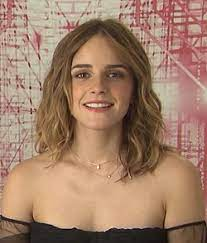
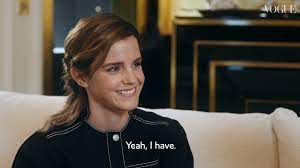
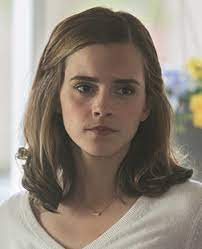
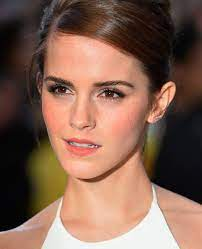

emma watson------------------ complete
CRAWLING COMPLETE


In [5]:
how_many = 10 #가져올 사진 수
path = '.\\' #코드 파일 위치 

from selenium import webdriver
from urllib.request import urlopen
#from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import urllib.request
import time
import os
import shutil

import threading
import time
from apscheduler.schedulers.background import BackgroundScheduler

import warnings
warnings.filterwarnings('ignore')

try: #크롤링 원본 이미지 저장 폴더 만들기
     os.makedirs('./' + orig )
except:
     pass
    
       
def start_findI():
    t = threading.Thread(target=findI)
    t.start()
    return t

def findI():
    findI = threading.currentThread()
    image.click()
    time.sleep(1.7)
    #xpath
    imgUrl = driver.find_element_by_xpath('/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div/div[1]/div/div/a/img').get_attribute("src")
    urllib.request.urlretrieve(imgUrl, name + str(count) + ".jpg")
    #print(name + str(count) + ".jpg --- find")

sched = BackgroundScheduler()
sched.start()
for name in target:
    driver = webdriver.Chrome('chromedriver.exe')
    driver.get("https://www.google.co.kr/imghp?hl=ko&ogbl")
    elem = driver.find_element_by_name("q")
    elem.send_keys(name)
    elem.send_keys(Keys.RETURN)
 
    SCROLL_PAUSE_TIME = 1
 
    last_height = driver.execute_script("return document.body.scrollHeight")
 
    while True: #페이지 로딩
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            try:
                driver.find_element_by_css_selector(".mye4qd").click()
            except:
                break
        last_height = new_height
 
    images = driver.find_elements_by_css_selector(".rg_i.Q4LuWd")
    print(name + ' crawling ready') 
    
    try: #name 폴더 만들기
        os.makedirs('./orig/' + name)
    except:
        pass
    

    count = 1
    trycount = 0
    for image in images: #로딩된 페이지에서 크롤링
        if(sched.running): #스레드가 작동중이지 않으면 멈춤
            trycount += 1
            try:
                t = start_findI()
            except:
                if(trycount > how_many*3):
                    print(name + ' crawling ERROR')
                    break
                else:
                    pass
            finally:
                time.sleep(3)
                try:     
                    t.do_run = False             
                except:
                    pass
                finally:
                    try:
                        if(os.path.isfile('{0}{1}.jpg'.format(path, name + str(count)))): #파일 저장 확인 후 이동 시키고 카운트업
                            from_ = '{0}{1}.jpg'.format(path, name + str(count))
                            to_ = '{0}{1}\{2}.jpg'.format(path+"orig\\", name, name + '_0' + str(count))
                            shutil.move(from_, to_)
                            count += 1
                    except:
                        pass
                    finally:
                        if(count > how_many):
                            break     
        else:
            break
    try:
        driver.close()
    except:
        pass
    finally:
        print(name + '------------------ complete')
        
print('CRAWLING COMPLETE')